In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import math

# matplotlit and seaborn for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# modeling 
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

sns.set_style("darkgrid")
# memory management
import gc
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv("dataset2.csv")
# import mglearn
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import LabelEncoder

In [37]:
X = df.drop(['당뇨여부', '식전혈당(공복혈당)'], axis='columns').copy()
y = df[['당뇨여부']].copy()
X

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,BMI
0,1,8,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,26.0
1,1,7,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,25.0
2,1,9,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,28.0
3,1,11,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,26.0
4,1,11,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180115,1,13,165,65,84.0,0.9,1.2,1.0,1.0,160.0,...,140.0,15.2,1.0,1.0,34.0,12.0,78.0,1.0,1.0,24.0
1180116,1,8,180,65,77.0,1.2,1.2,1.0,1.0,123.0,...,60.0,15.9,1.0,1.0,11.0,8.0,15.0,3.0,1.0,20.0
1180117,2,14,155,55,83.0,0.2,0.6,1.0,1.0,146.0,...,148.0,12.4,1.0,0.7,21.0,15.0,23.0,1.0,0.0,23.0
1180118,2,14,155,55,84.0,0.9,1.2,1.0,1.0,130.0,...,148.0,12.9,1.0,0.8,29.0,14.0,19.0,1.0,0.0,23.0


## 비당뇨 : 당뇨 = 10 : 8

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, sampling_strategy=0.8)
X_rus, y_rus = rus.fit_resample(X, y)


In [39]:
print(len(X_rus))
print(len(y_rus))
print(np.sum(y_rus))

104802
104802
당뇨여부    46579.0
dtype: float64


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus.values,stratify = y_rus, random_state=42, test_size=0.2)
from lightgbm import LGBMClassifier, plot_importance
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = RobustScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)
lgb = LGBMClassifier(n_estimators=400)
evals = [(x_test, y_test)]

In [41]:
# lgb.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals, verbose=True)
lgb.fit(x_train, y_train, eval_metric="logloss",eval_set=evals, verbose=False)

LGBMClassifier(n_estimators=400)

In [42]:
y_pred = lgb.predict(x_test)

## 정확도

In [43]:
lgb.score(x_test, y_test)

0.7138495300796718

## 예측 결과

In [44]:
print("당뇨로 예측한 데이터 수 :", np.sum(y_pred))
print("실제 당뇨 데이터 수 :", np.sum(y_test))
print("전체 데이터 수 :", len(y_test))

당뇨로 예측한 데이터 수 : 9698.0
실제 당뇨 데이터 수 : 9316.0
전체 데이터 수 : 20961


## TN, FP, FN, TP

In [45]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

# [[TN,FP], 
#  [FN,TP]]

array([[8455, 3190],
       [2808, 6508]])

## TN, FP, FN, TP 검토

In [46]:
y_test = y_test.reshape(-1)

In [47]:
P = sum(y_test)
TP = sum((y_test==1) & (y_pred==1))
TPR = TP/P
FN = sum((y_test==1) & (y_pred==0))
FNR = FN/P
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
TNR = TN/N
FP = sum((y_test==0) & (y_pred==1))
FPR = FP/N
print(TN, FP, FN, TP)
print(TPR, FPR)

8455 3190 2808 6508
0.6985830828681838 0.2739373121511378


## 데이터 별 당뇨 분류 확률

In [48]:
y_pred_proba = lgb.predict_proba(x_test)
y_pred_proba

array([[0.656437  , 0.343563  ],
       [0.48846492, 0.51153508],
       [0.82821408, 0.17178592],
       ...,
       [0.45969127, 0.54030873],
       [0.39374493, 0.60625507],
       [0.37182844, 0.62817156]])

**[당뇨X 확률, 당뇨 확률]**

In [52]:
pos_proba = y_pred_proba[:,1]

## 데이터 별 당뇨로 예측할 확률

In [53]:
print("pos_proba 최솟값 :", min(pos_proba))
print("pos_proba 최댓값 :", max(pos_proba))

pos_proba 최솟값 : 0.0033004364578091416
pos_proba 최댓값 : 0.9789332326353558


(array([1525., 1359., 1135.,  944.,  972.,  932.,  957.,  995., 1078.,
        1161., 1199., 1284., 1413., 1347., 1402., 1302.,  964.,  657.,
         281.,   54.]),
 array([0.00330044, 0.05208208, 0.10086372, 0.14964536, 0.198427  ,
        0.24720864, 0.29599028, 0.34477192, 0.39355355, 0.44233519,
        0.49111683, 0.53989847, 0.58868011, 0.63746175, 0.68624339,
        0.73502503, 0.78380667, 0.83258831, 0.88136995, 0.93015159,
        0.97893323]),
 <BarContainer object of 20 artists>)

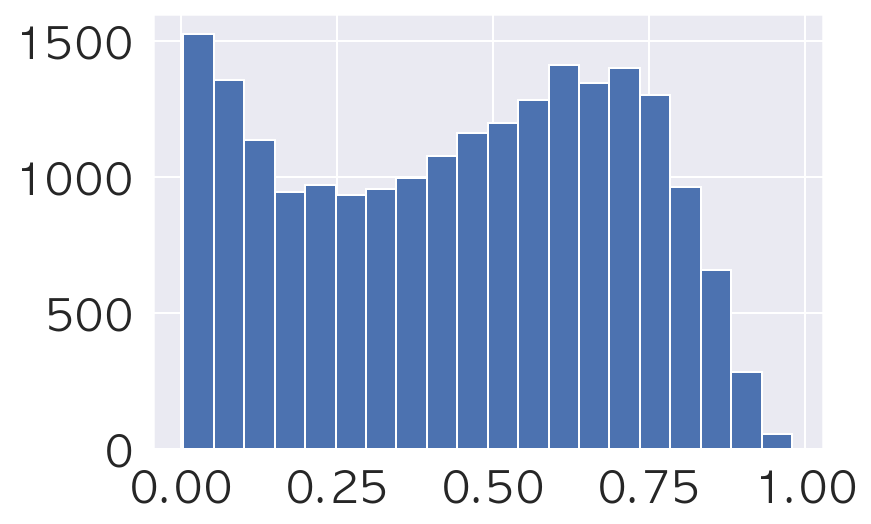

In [54]:
plt.hist(pos_proba, range=(min(pos_proba),max(pos_proba)), bins=20)

## 당뇨 예측 확률과 실제 데이터

In [55]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

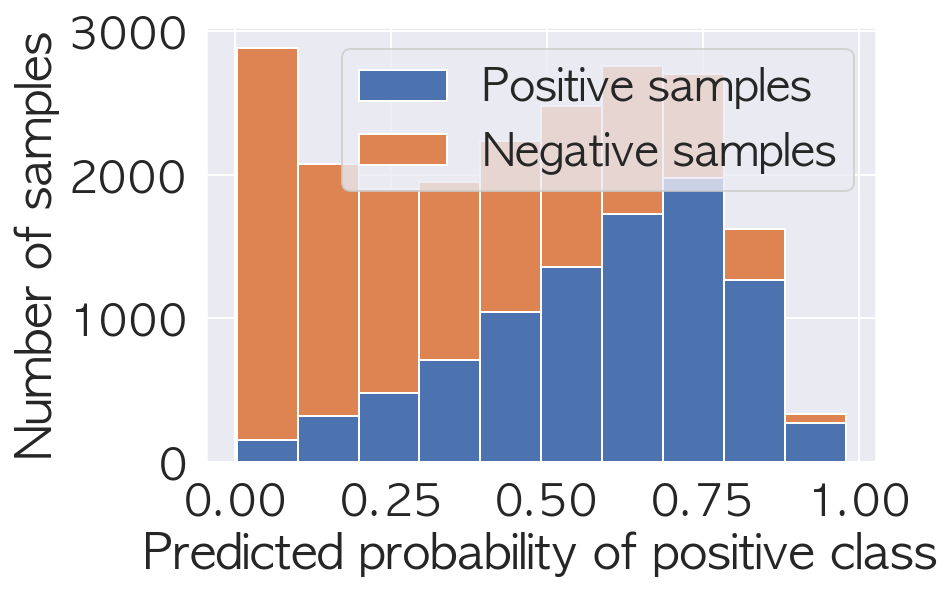

In [56]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype="barstacked")
plt.legend(["Positive samples", "Negative samples"])
plt.xlabel("Predicted probability of positive class")
plt.ylabel("Number of samples")

## ROC Curve

In [57]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

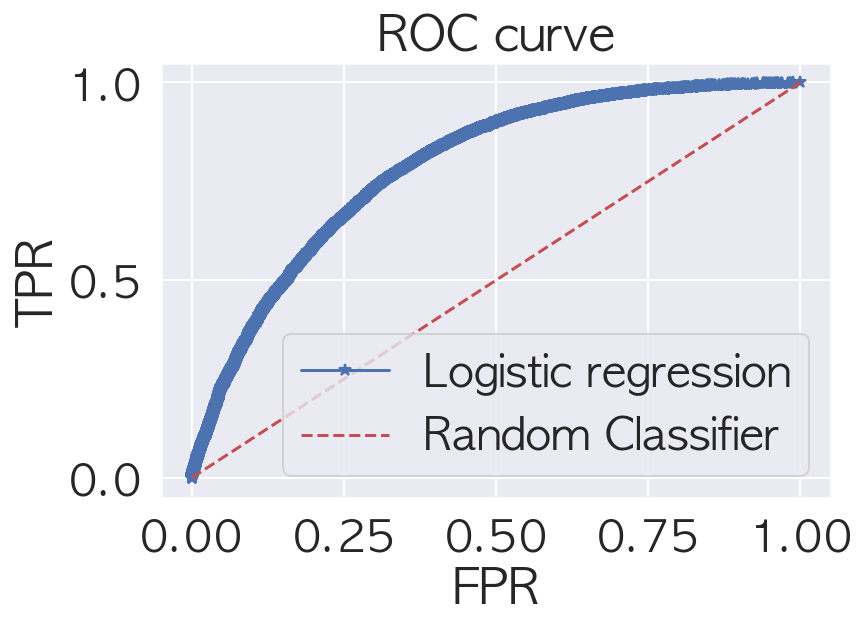

In [58]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic regression', 'Random Classifier'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

## AUC Score

In [59]:
metrics.roc_auc_score(y_test, pos_proba)

0.7880735940751895

## Precision, Recall, Accuracy

In [60]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/(TP+FP+TN+FN)
print("precision :",precision)
print("recall :", recall)
print("accuracy :", accuracy)

precision : 0.6710661992163333
recall : 0.6985830828681838
accuracy : 0.7138495300796718


In [61]:
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_test, pos_proba)

(0.0, 1.0)

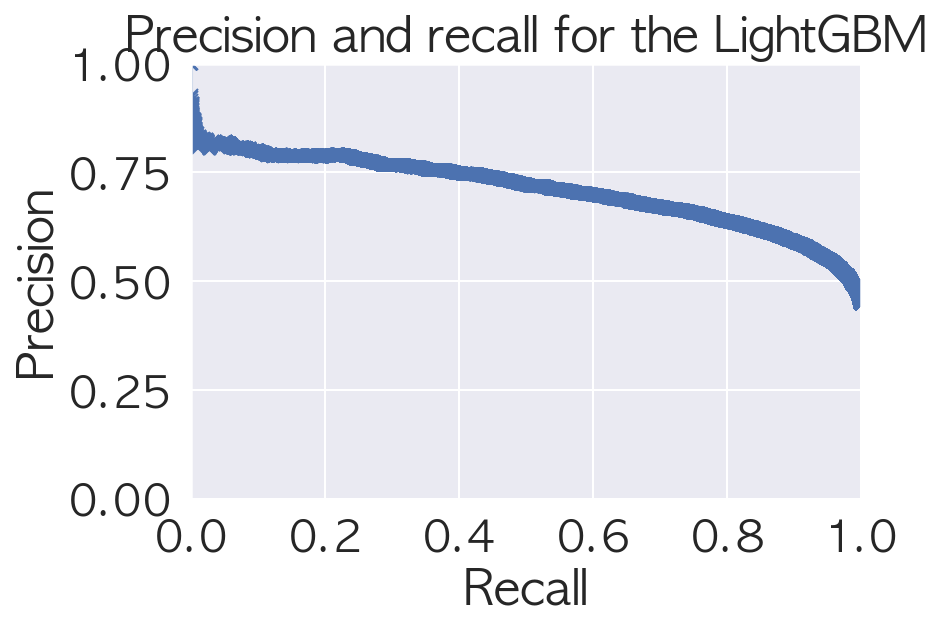

In [62]:
plt.plot(recall2, precision2, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the LightGBM')
plt.xlim([0,1])
plt.ylim([0,1])

In [63]:
metrics.auc(recall2, precision2)

0.7096229379046504

In [64]:
f1 = (precision*recall*2)/(precision+recall)
print(f1)

0.6845482276217524


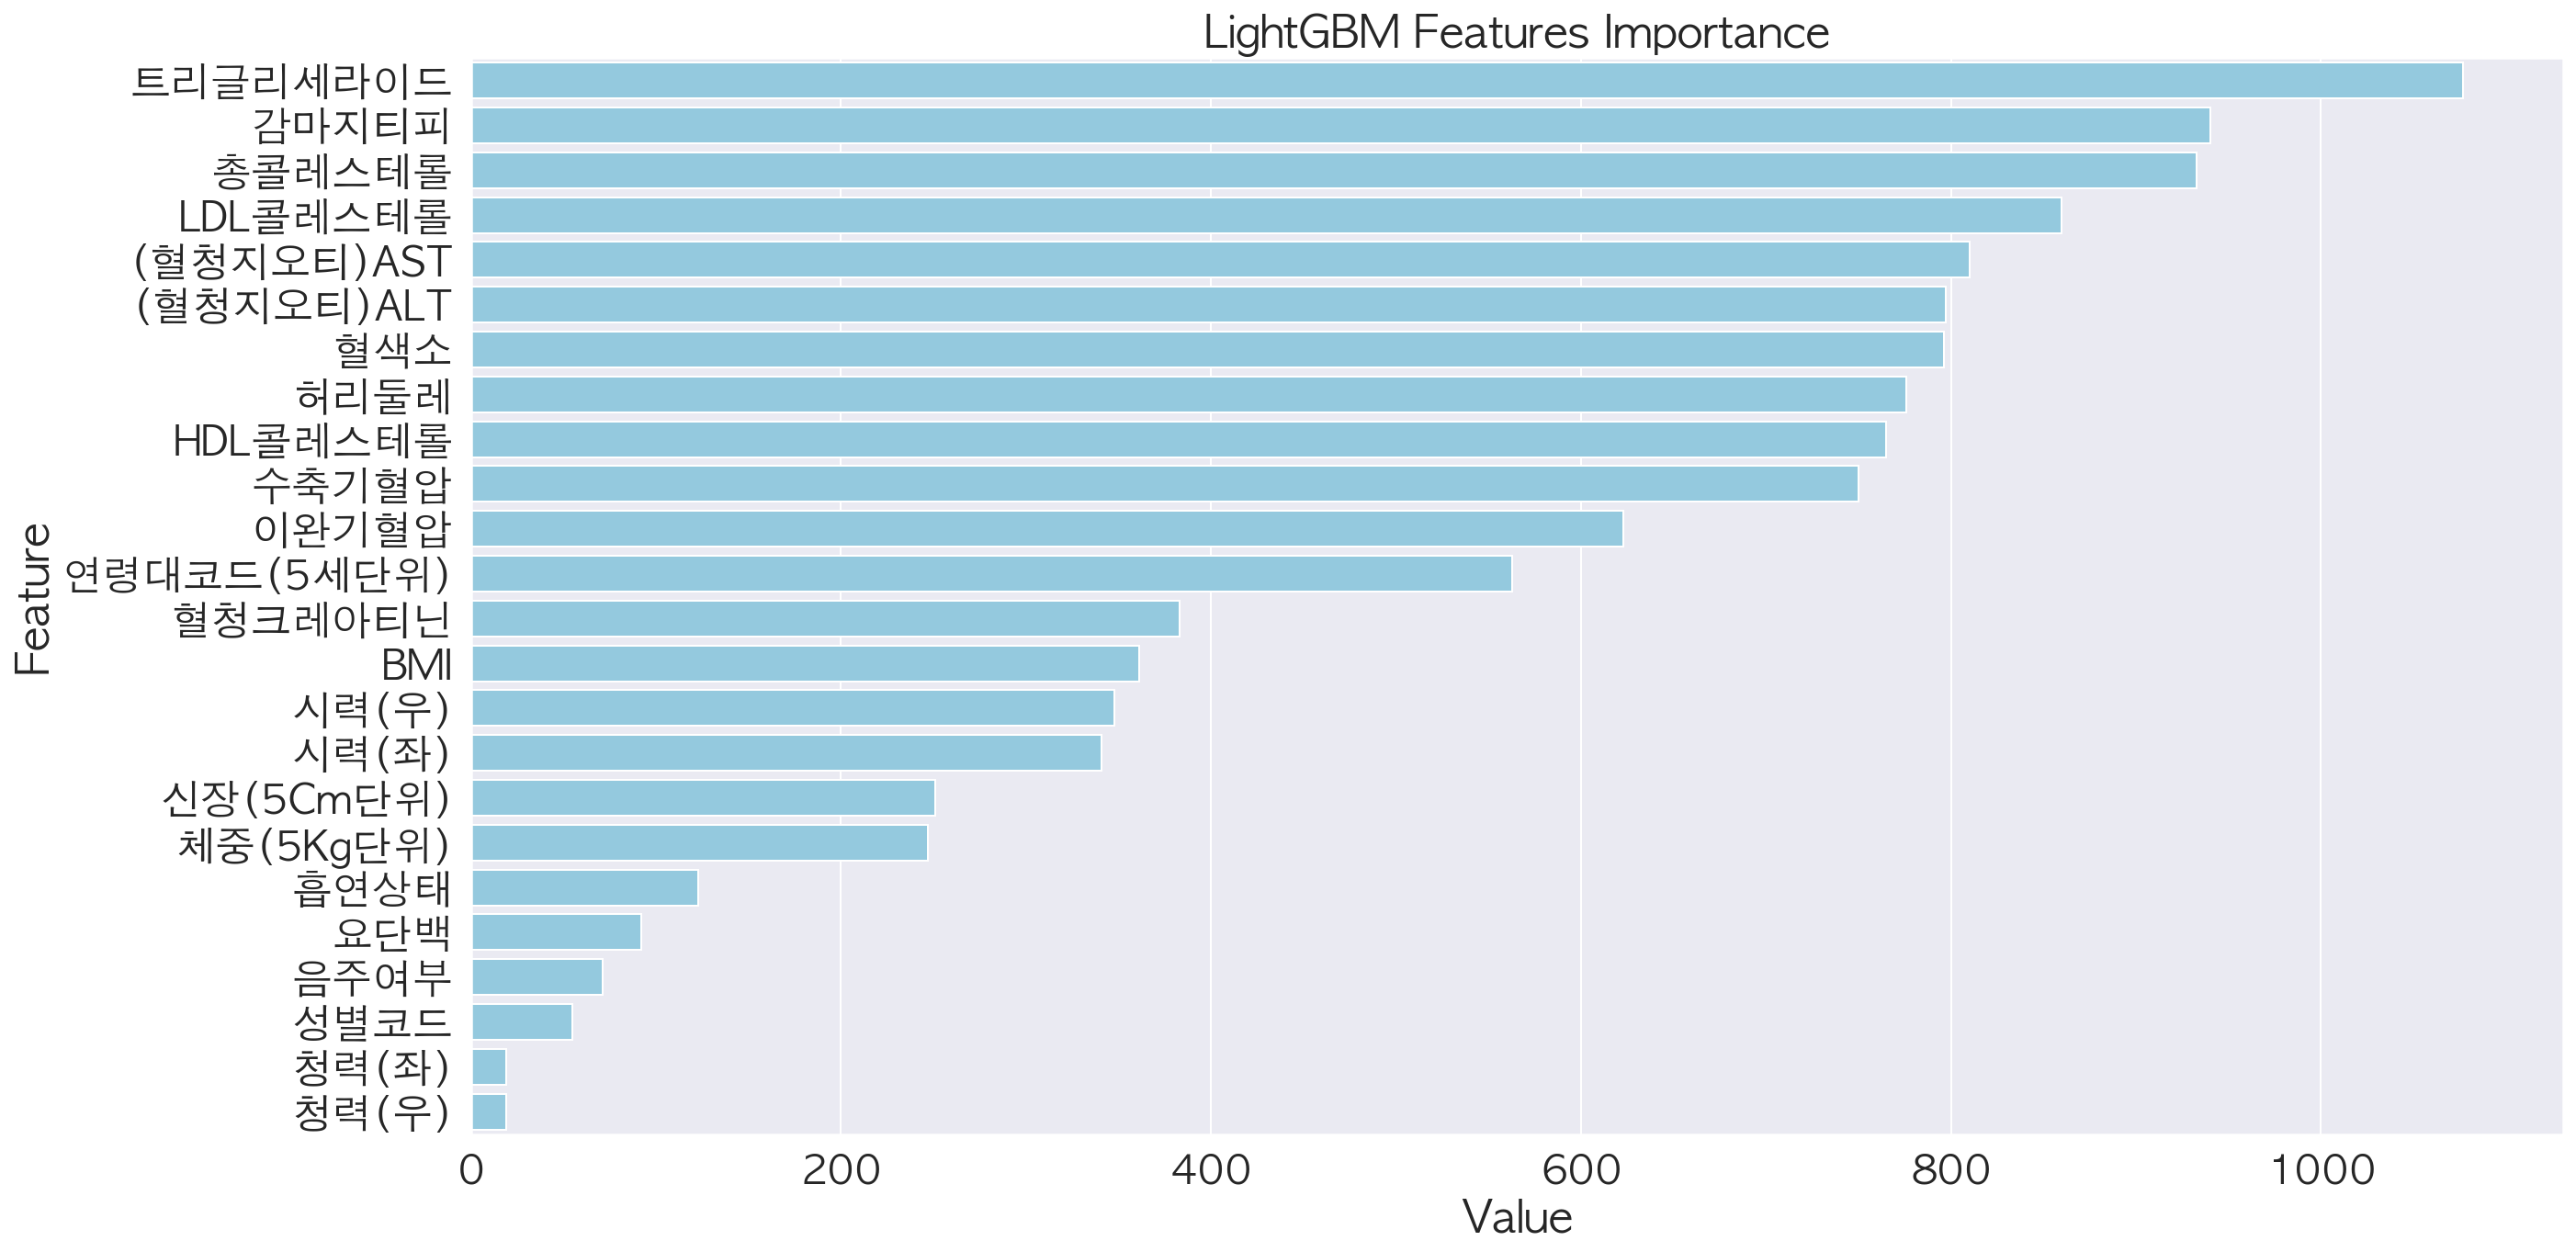

In [65]:
from lightgbm import LGBMClassifier, plot_importance
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.set(font_scale=2, font="AppleGothic")
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False), color="skyblue")
plt.title('LightGBM Features Importance')
plt.tight_layout()
plt.show()

In [67]:
type(lgb.feature_importances_)
lgb.feature_importances_.shape

(24,)

In [90]:
importances = np.array([0]*24)
type(importances)
importances.shape

(24,)

In [92]:
test_count = 0
for i in range(1,11):
    rus = RandomUnderSampler(random_state=i, sampling_strategy=0.8)
    X_rus, y_rus = rus.fit_resample(X, y)
    for j in range(1,11):
        test_count += 1
        X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus.values,stratify = y_rus, random_state=j, test_size=0.2)
        sc = RobustScaler()
        x_train = sc.fit_transform(X_train)
        x_test = sc.transform(X_test)
        lgb = LGBMClassifier(n_estimators=400)
        evals = [(x_test, y_test)]
        lgb.fit(x_train, y_train, eval_metric="logloss",eval_set=evals, verbose=False)
        importances += lgb.feature_importances_

In [93]:
importances = importances/test_count

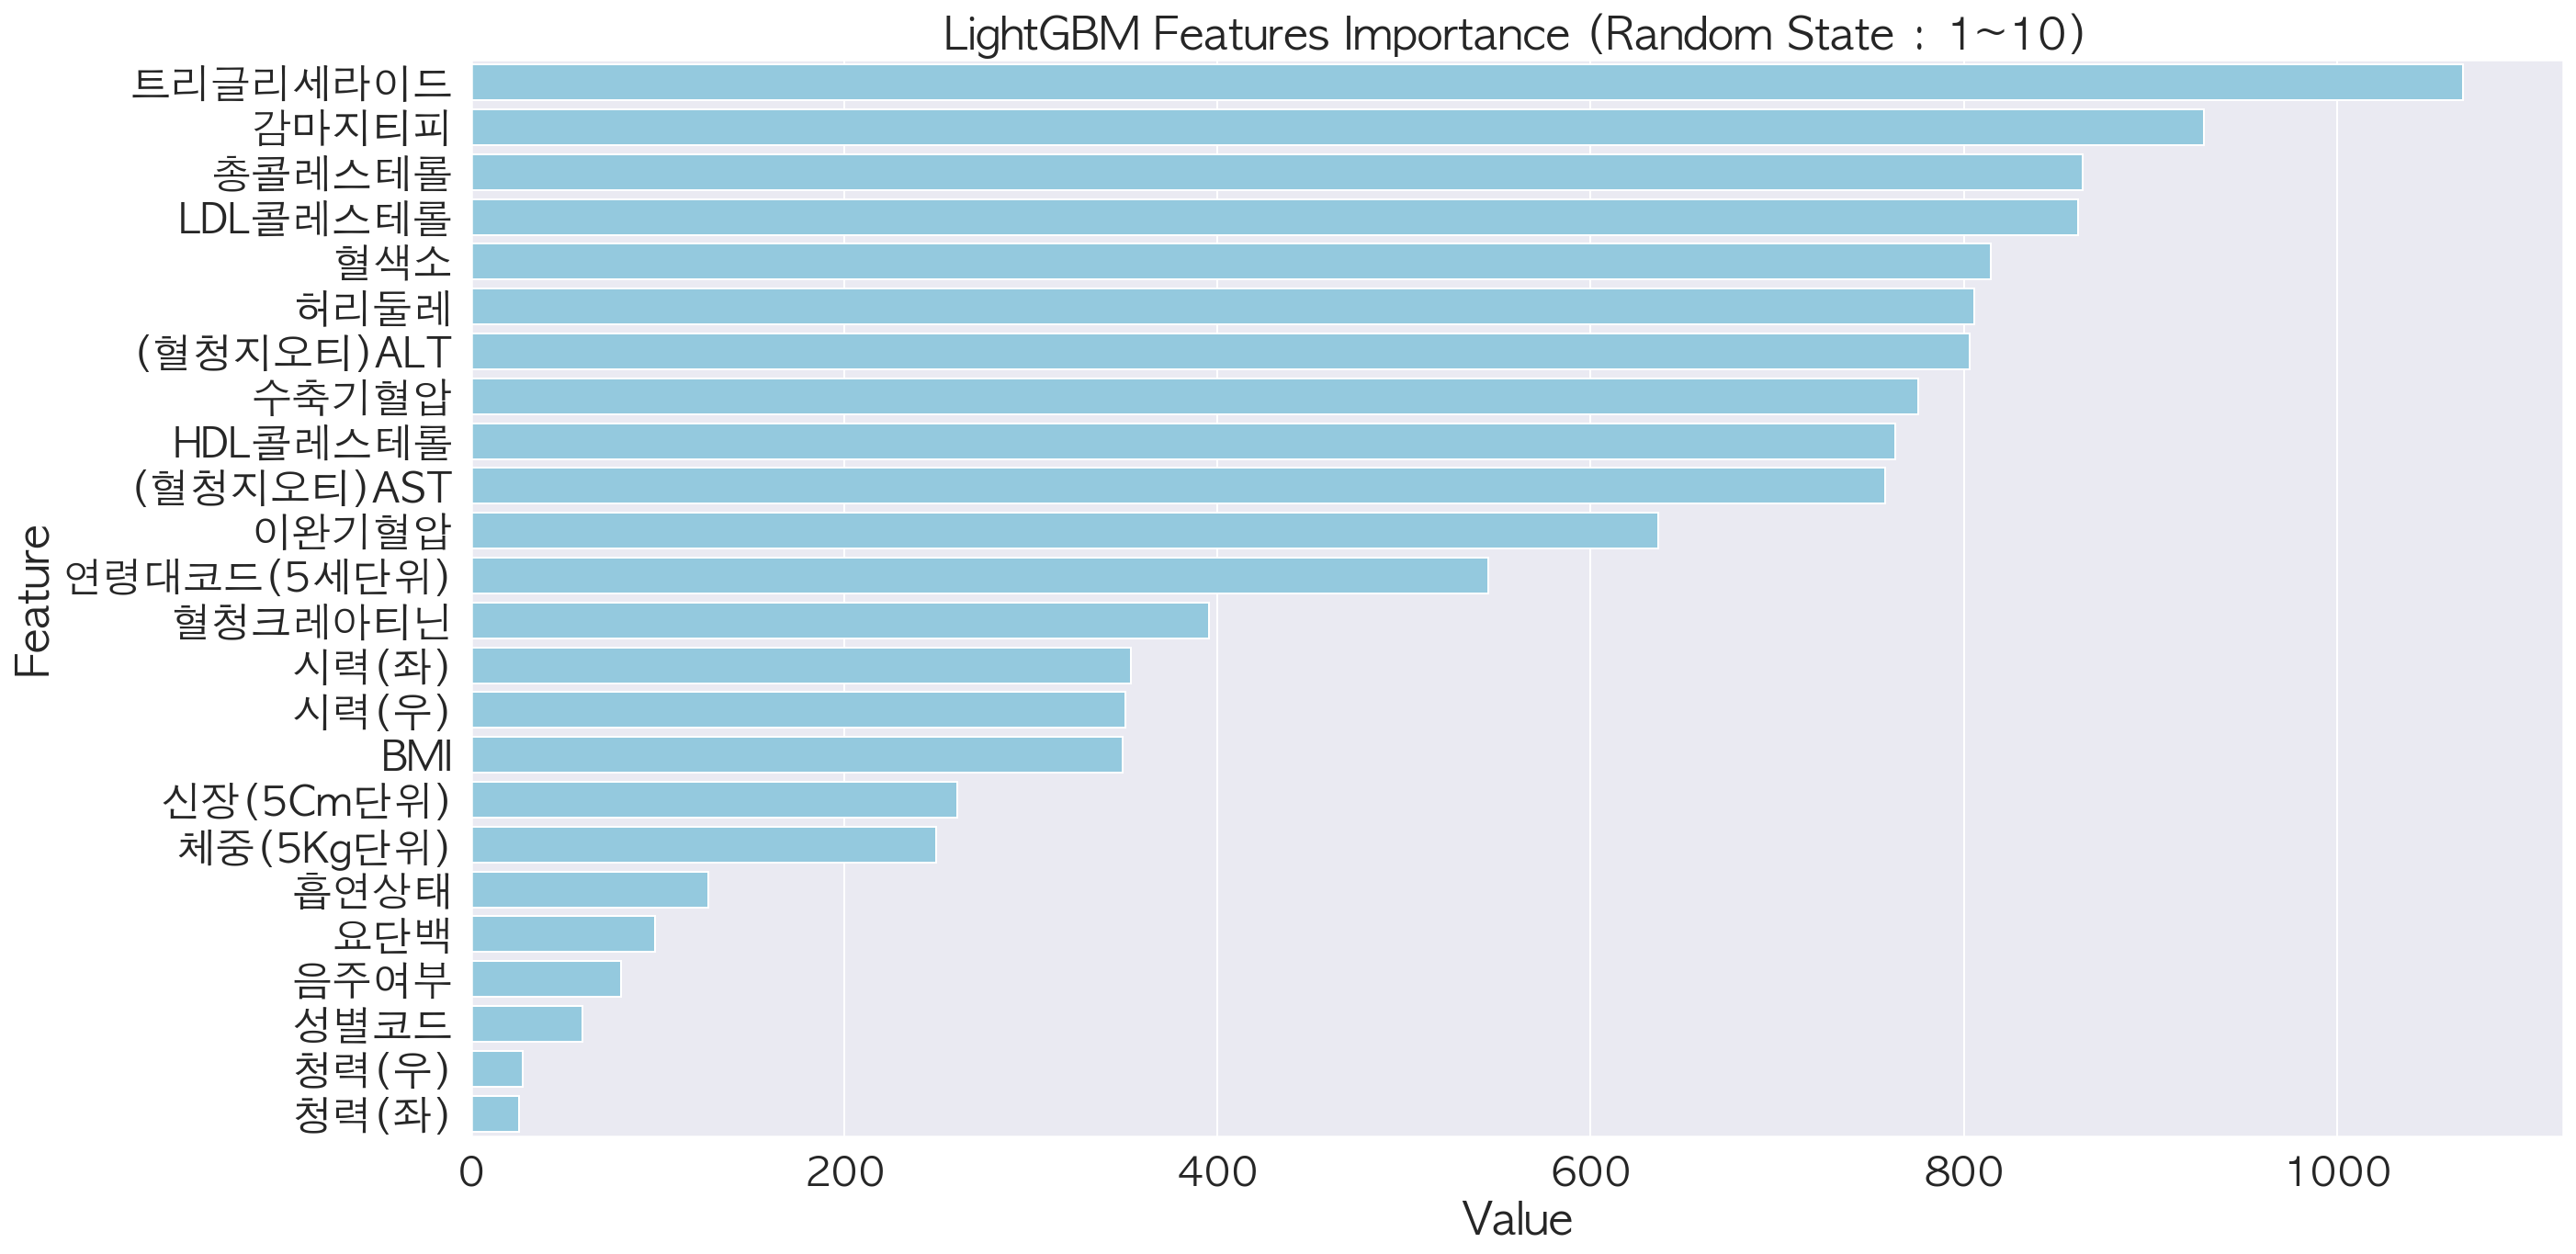

In [95]:
feature_imp = pd.DataFrame(sorted(zip(importances,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.set(font_scale=2, font="AppleGothic")
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False), color="skyblue")
plt.title('LightGBM Features Importance (Random State : 1~10)')
plt.tight_layout()
plt.show()